# 泰坦尼克号乘客获救预测
## 数据探索
### 1.数据总览

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()
print("-" * 40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**`从上面我们可以看出，Age、Cabin、Embarked、Fare几个特征存在缺失值。`**

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 查看存活的比例

In [6]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

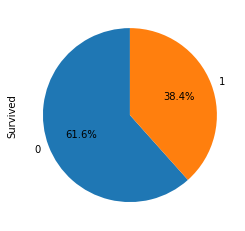

In [7]:
train.Survived.value_counts().plot.pie(labeldistance = 1.1, autopct = '%3.1f%%',
                                               shadow = False, startangle = 90, pctdistance = 0.6);
#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
#pctdistance，百分比的text离圆心的距离
#patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

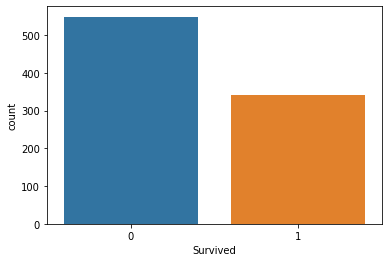

In [8]:
sns.countplot(train.Survived);

### 2.缺失值处理

In [9]:
# 在哪儿上船Embarked这一属性（共有三个上船地点），缺失俩值，可以用众数赋值
train.Embarked[train.Embarked.isnull()]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [10]:
train.Embarked.dropna().mode().values

array(['S'], dtype=object)

In [11]:
train.Embarked[train.Embarked.isnull()] = train.Embarked.dropna().mode().values
train.Embarked[train.Embarked.isnull()]

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Series([], Name: Embarked, dtype: object)

In [12]:
# train['Embarked'] = np.array('S')
# train.head()

In [13]:
# 对于标称属性，可以赋一个代表缺失的值，比如‘U0’。
# 因为缺失本身也可能代表着一些隐含信息。比如船舱号Cabin这一属性，缺失可能代表并没有船舱。
train['Cabin'] = train.Cabin.fillna('U0')
# train.Cabin[train.Cabin.isnull()] = 'U0'
# train.loc[train.Cabin.isnull(),'Cabin'] = 'U0'

`使用回归 随机森林等模型来预测缺失属性的值。因为Age在该数据集里是一个相当重要的特征（先对Age进行分析即可得知），所以保证一定的缺失值填充准确率是非常重要的，对结果也会产生较大影响。一般情况下，会使用数据完整的条目作为模型的训练集，以此来预测缺失值。对于当前的这个数据，可以使用随机森林来预测也可以使用线性回归预测。这里使用随机森林预测模型，选取数据集中的数值属性作为特征（因为sklearn的模型只能处理数值属性，所以这里先仅选取数值特征，但在实际的应用中需要将非数值特征转换为数值特征）`

In [14]:
from sklearn.ensemble import RandomForestRegressor

age_df = train[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train['Age'].notnull())]
age_df_isnull = age_df.loc[(train['Age'].isnull())]
age_df_notnull

,Age,Survived,Fare,Parch,SibSp,Pclass
0,22.0,0,7.2500,0,1,3
1,38.0,1,71.2833,0,1,1
2,26.0,1,7.9250,0,0,3
3,35.0,1,53.1000,0,1,1
4,35.0,0,8.0500,0,0,3
...,...,...,...,...,...,...
885,39.0,0,29.1250,5,0,3
886,27.0,0,13.0000,0,0,2
887,19.0,1,30.0000,0,0,1
889,26.0,1,30.0000,0,0,1


In [15]:
age_df_isnull

,Age,Survived,Fare,Parch,SibSp,Pclass
5,NaN,0,8.4583,0,0,3
17,NaN,1,13.0000,0,0,2
19,NaN,1,7.2250,0,0,3
26,NaN,0,7.2250,0,0,3
28,NaN,1,7.8792,0,0,3
...,...,...,...,...,...,...
859,NaN,0,7.2292,0,0,3
863,NaN,0,69.5500,2,8,3
868,NaN,0,9.5000,0,0,3
878,NaN,0,7.8958,0,0,3


In [16]:
X = age_df_notnull.values[:,1:]
Y = age_df_notnull.values[:,0]

# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [17]:
predictAges = RFR.predict(age_df_isnull.values[:,1:])
predictAges[:5]

array([24.14992353, 33.53944079, 18.46095238, 35.07517433, 22.62095451])

In [18]:
train.loc[train['Age'].isnull(), ['Age']] = predictAges
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
5,6,0,3,"Moran, Mr. James",male,24.149924,0,0,330877,8.4583,U0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,U0,S


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 3.分析数据关系
#### 3.1性别与是否生存的关系 Sex

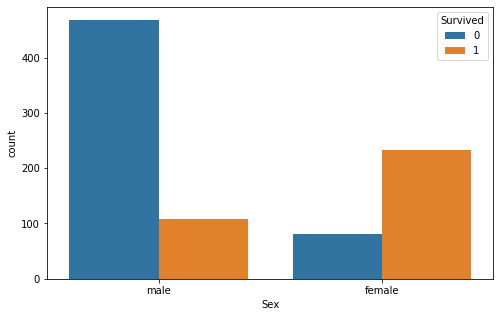

In [20]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

In [21]:
train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [22]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


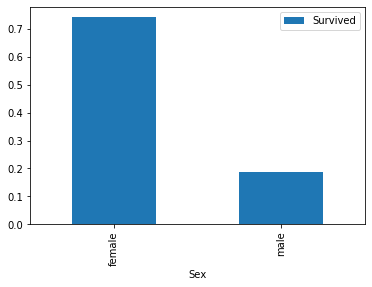

In [23]:
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar();

从不同性别的生存率可见在泰坦尼克号事故中，女性的存活概率明显高于男性。

#### 3.2 船舱等级和生存与否的关系 Pclass

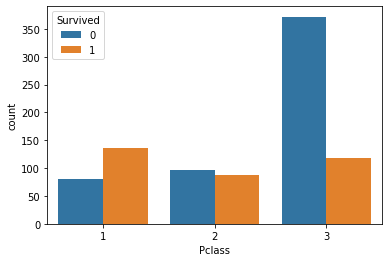

In [24]:
sns.countplot(x='Pclass', hue='Survived', data=train);

In [25]:
train.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [26]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


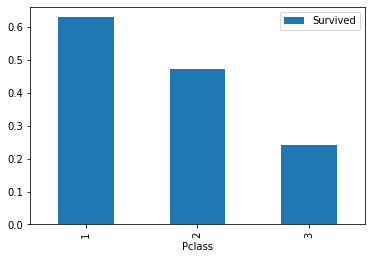

In [27]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar();

In [28]:
# 不同等级船舱的男女生存率
train.groupby(['Pclass','Sex', 'Survived'])['Survived'].count()

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [29]:
train[['Sex', 'Pclass', 'Survived']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

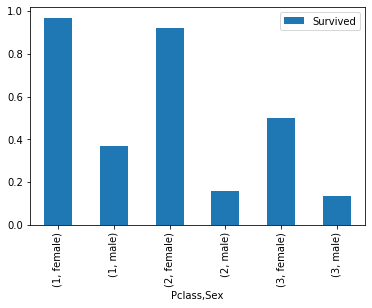

In [30]:
train[['Sex', 'Pclass', 'Survived']].groupby(['Pclass', 'Sex']).mean().plot.bar();

从图表中可以看出船舱等级越高，存活人数越多；并且不论在哪个等级的船舱中，存活的这些人中女性都明显多于男性。

#### 3.3 年龄与存活与否的关系 Age
**分别分析不同等级船舱和不同性别下的年龄分布和生存的关系：**

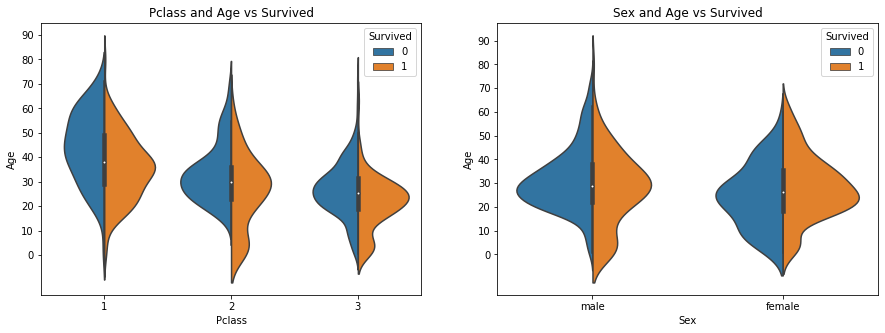

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Pclass", "Age", hue="Survived", data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived') 

ax[1].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue="Survived", data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
 
plt.show()

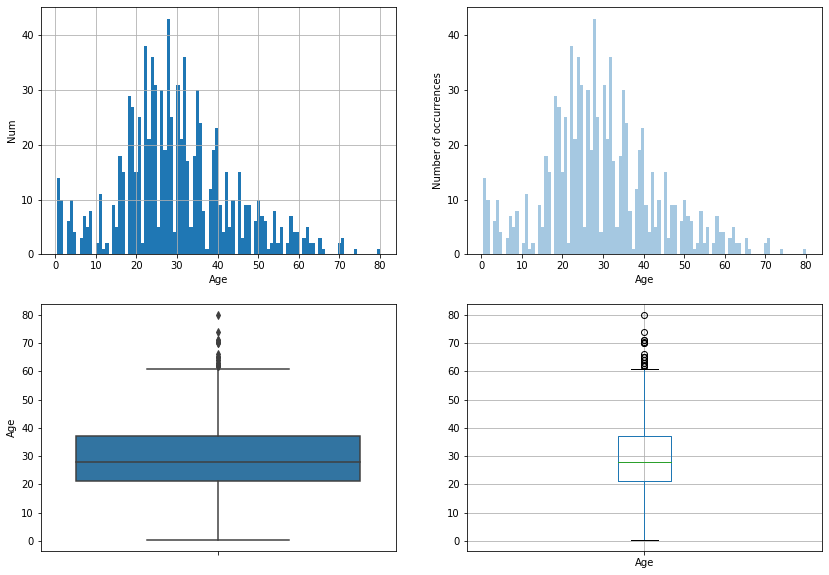

In [32]:
# 分析总体的年龄分布：
plt.figure(figsize=(14,10))

plt.subplot(221)
train['Age'].hist(bins=100)
plt.xlabel('Age')
plt.ylabel('Num')
 
plt.subplot(222)
sns.distplot(train['Age'], kde=False, bins=100)
plt.ylabel('Number of occurrences')
    
plt.subplot(223)
sns.boxplot(y='Age', data=train)

plt.subplot(224)
train.boxplot(column='Age', showfliers=True)

plt.show()

**不同年龄下的生存和非生存的分布情况：**

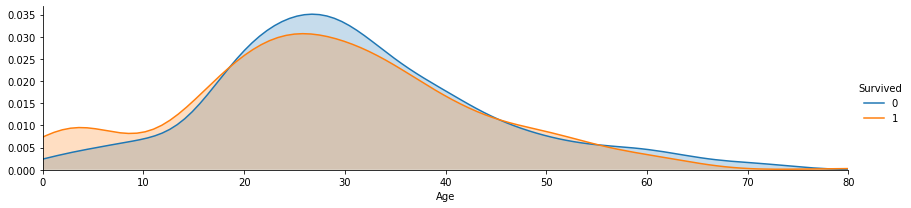

In [33]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

**不同年龄下的平均生存率：**

In [34]:
# average survived passengers by age
train['Age_int'] = train['Age'].astype(int)

average_age = train[["Age_int", "Survived"]].groupby(['Age_int'], as_index=False).mean()
average_age

,Age_int,Survived
0,0,1.000000
1,1,0.714286
2,2,0.300000
3,3,0.833333
4,4,0.700000
...,...,...
66,66,0.000000
67,70,0.000000
68,71,0.000000
69,74,0.000000


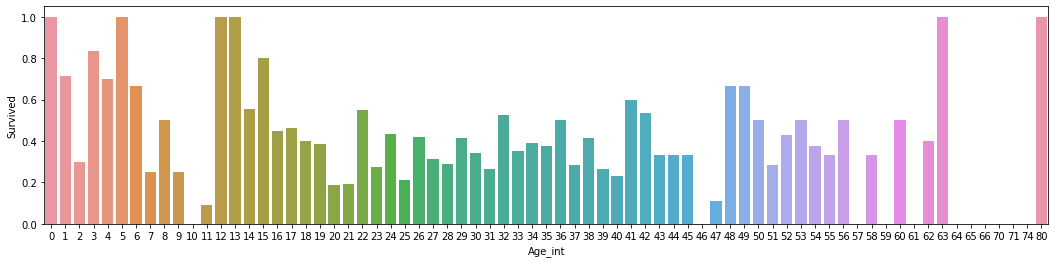

In [35]:
fig, axis1 = plt.subplots(1, 1, figsize=(18,4))

sns.barplot(x='Age_int', y='Survived', data=average_age);

In [36]:
train['Age'].describe()

count    891.000000
mean      29.650891
std       13.735471
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

**样本有891，平均年龄约为30岁，标准差13.5岁，最小年龄0.42，最大年龄80.
按照年龄，将乘客划分为儿童、少年、成年、老年，分析四个群体的生还情况：**

In [37]:
bins = [0, 12, 18, 65, 100]

train['Age_group'] = pd.cut(train['Age'], bins)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,22,"(18, 65]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,"(18, 65]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,26,"(18, 65]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35,"(18, 65]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,35,"(18, 65]"


In [38]:
by_age = train.groupby(['Age_group'])['Survived'].mean()
by_age

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64

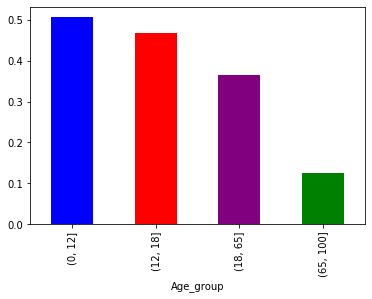

In [39]:
# by_age.plot.bar()
by_age.plot(kind='bar', color=['blue', 'red', 'purple', 'green']);

#### 3.4 称呼与存活与否的关系 Name

通过观察名字数据，我们可以看出其中包括对乘客的称呼，如：Mr、Miss、Mrs等，称呼信息包含了乘客的年龄、性别，同时也包含了入社会地位等的称呼，如：Dr，Lady，Major（少校），Master（硕士，主人，师傅）等的称呼。

In [40]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


**观察不同称呼与生存率的关系**

In [41]:
train.groupby(['Title', 'Survived'])['Survived'].count()

Title     Survived
Capt      0             1
Col       0             1
          1             1
Countess  1             1
Don       0             1
Dr        0             4
          1             3
Jonkheer  0             1
Lady      1             1
Major     0             1
          1             1
Master    0            17
          1            23
Miss      0            55
          1           127
Mlle      1             2
Mme       1             1
Mr        0           436
          1            81
Mrs       0            26
          1            99
Ms        1             1
Rev       0             6
Sir       1             1
Name: Survived, dtype: int64

In [42]:
train[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Capt,0.000000
Col,0.500000
Countess,1.000000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000


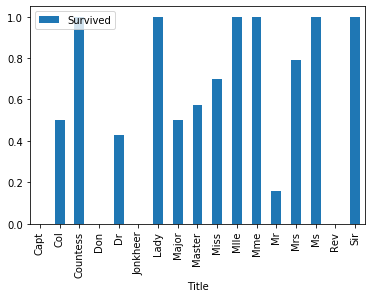

In [43]:
train[['Title', 'Survived']].groupby(['Title']).mean().plot.bar();

**同时，对于名字，我们还可以观察名字长度和生存率之间存在关系的可能**

In [44]:
train['Name_length'] = train['Name'].apply(len)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int,Age_group,Title,Name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,22,"(18, 65]",Mr,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38,"(18, 65]",Mrs,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,26,"(18, 65]",Miss,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35,"(18, 65]",Mrs,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,35,"(18, 65]",Mr,24


In [45]:
train.groupby(['Name_length', 'Survived'])['Survived'].count()

Name_length  Survived
12           0           1
             1           1
13           0           1
             1           1
14           0           2
                        ..
57           1           1
61           1           1
65           1           1
67           1           1
82           1           1
Name: Survived, Length: 87, dtype: int64

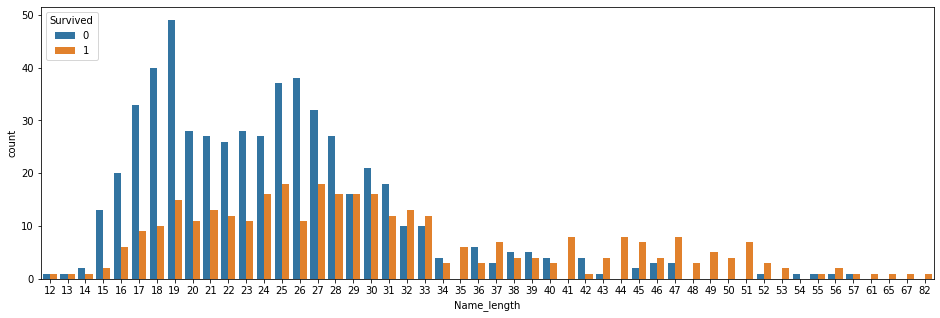

In [46]:
plt.figure(figsize=(16, 5))

sns.countplot(x='Name_length', data=train, hue='Survived');

In [47]:
name_length = train[['Name_length', 'Survived']].groupby(['Name_length'], as_index=False).mean()
name_length.head()

,Name_length,Survived
0,12,0.500000
1,13,0.500000
2,14,0.333333
3,15,0.133333
4,16,0.230769


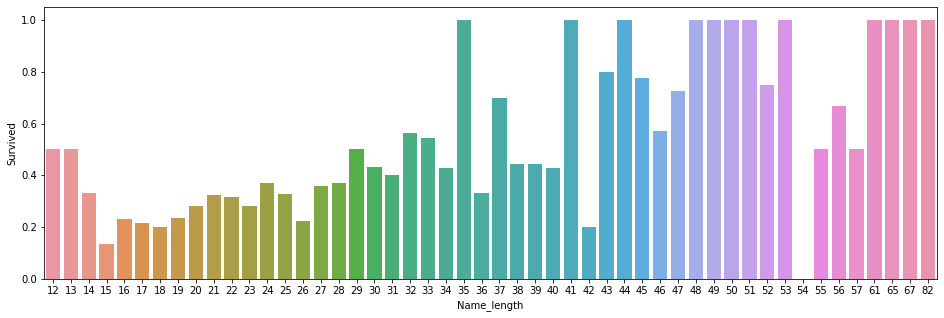

In [48]:
plt.figure(figsize=(16, 5))

sns.barplot(name_length['Name_length'], name_length['Survived']);

**名字长度和生存与否确实也存在一定的相关性**

### 3.5 有无兄弟姐妹和存活与否的关系 SibSp

In [49]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [50]:
sibsp_df = train[train['SibSp'] != 0]
no_sibsp_df = train[train['SibSp'] == 0]
no_sibsp_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_int,Age_group,Title,Name_length
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S,26,"(18, 65]",Miss,22
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S,35,"(18, 65]",Mr,24
5,6,0,3,"Moran, Mr. James",male,24.149924,0,0,330877,8.4583,U0,Q,24,"(18, 65]",Mr,16
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,54,"(18, 65]",Mr,23
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,U0,S,27,"(18, 65]",Mrs,49


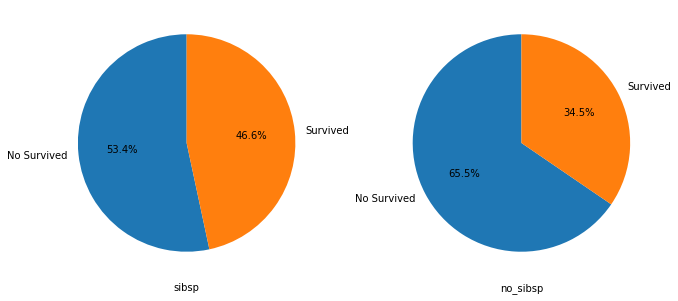

In [51]:
plt.figure(figsize=(11, 5))

plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'], labeldistance = 1.1, 
                                             autopct = '%3.1f%%', shadow = False, startangle = 90, pctdistance = 0.6)
plt.xlabel('sibsp')
plt.ylabel('')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'], labeldistance = 1.1, 
                                             autopct = '%3.1f%%', shadow = False, startangle = 90, pctdistance = 0.6)
plt.xlabel('no_sibsp')
plt.ylabel('')

plt.show()

In [52]:
train.groupby(['SibSp', 'Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

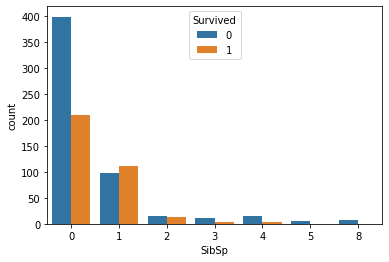

In [53]:
sns.countplot(x='SibSp', data=train, hue='Survived');

In [54]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


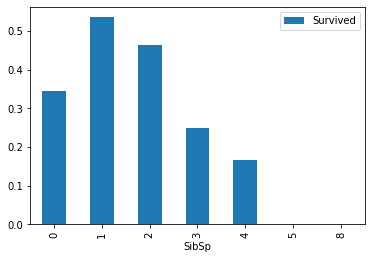

In [55]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot.bar()

#### 3.6 有无父母子女和存活与否的关系 Parch

In [56]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

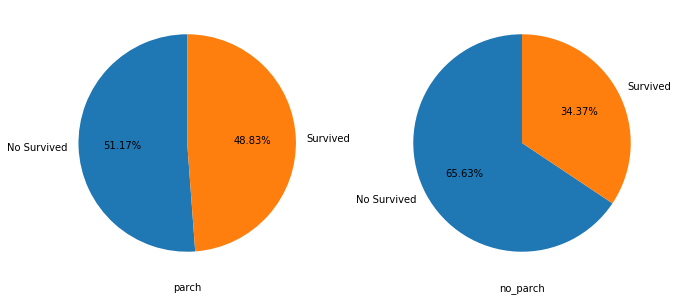

In [57]:
parch_df = train[train['Parch'] != 0]
no_parch_df = train[train['Parch'] == 0]

plt.figure(figsize=(11, 5))

plt.subplot(121)
parch_df.Survived.value_counts().plot.pie(labels=['No Survived','Survived'], labeldistance = 1.1, 
                                             autopct = '%1.2f%%', shadow = False, startangle = 90, pctdistance = 0.6)
plt.xlabel('parch')
plt.ylabel('')

plt.subplot(122)
no_parch_df.Survived.value_counts().plot.pie(labels=['No Survived','Survived'], labeldistance = 1.1, 
                                             autopct = '%1.2f%%', shadow = False, startangle = 90, pctdistance = 0.6)
plt.xlabel('no_parch')
plt.ylabel('')

plt.show()

#### 3.7 亲友的人数和存活与否的关系 SibSp & Parch

Text(0.5, 1.0, 'Parch and Survived')

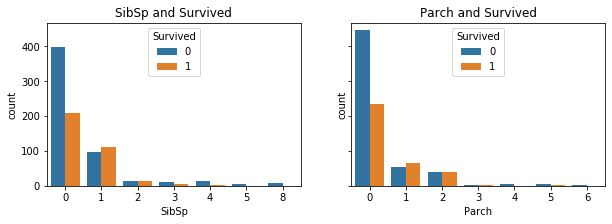

In [58]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 3))

sns.countplot(x='SibSp', data=train, hue='Survived', ax=ax[0])
ax[0].set_title('SibSp and Survived')
sns.countplot(x='Parch', data=train, hue='Survived', ax=ax[1])
ax[1].set_title('Parch and Survived')

Text(0.5, 1.0, 'Parch and Survived')

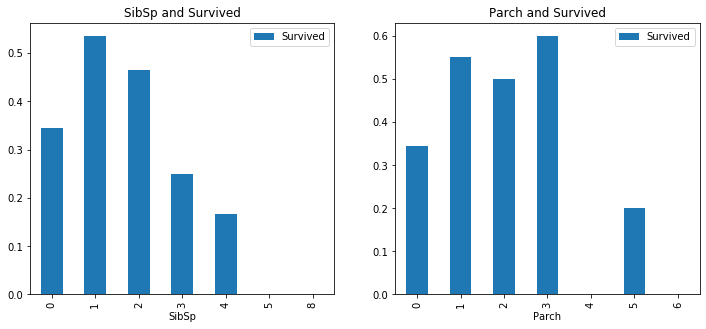

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

train[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[0])
ax[0].set_title('SibSp and Survived')
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[1])
ax[1].set_title('Parch and Survived')

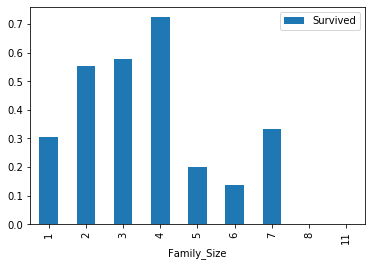

In [60]:
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1

train[['Family_Size', 'Survived']].groupby(['Family_Size']).mean().plot.bar()

从图表中可以看出，若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低。

#### 3.8 票价分布和存活与否的关系 Fare

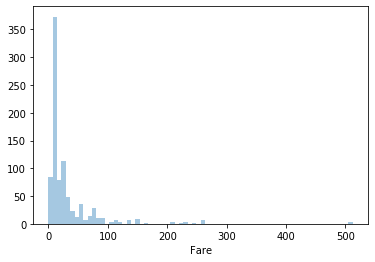

In [61]:
sns.distplot(train.Fare, bins=70, kde=False);

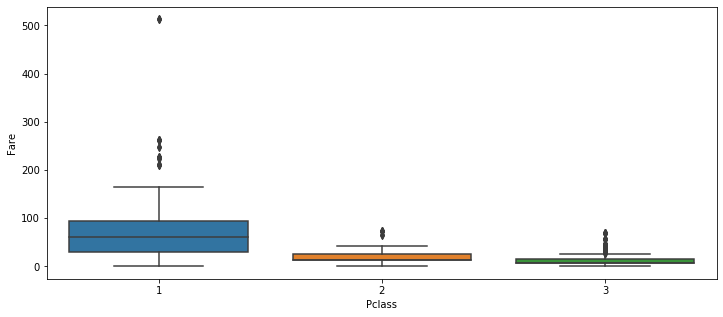

In [62]:
plt.figure(figsize=(12, 5))

sns.boxplot(y='Fare', data=train, x='Pclass');
#train.boxplot(column='Fare', by='Pclass', showfliers=False)

In [63]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**绘制生存与否与票价均值和方差的关系：**

In [64]:
fare_not_survived = train['Fare'][train['Survived'] == 0]
fare_survived = train['Fare'][train['Survived'] == 1]
fare_not_survived

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64

In [65]:
average_fare = pd.DataFrame([fare_not_survived.mean(),fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(),fare_survived.std()])
std_fare

,0
0,31.388207
1,66.596998


In [66]:
average_fare

,0
0,22.117887
1,48.395408


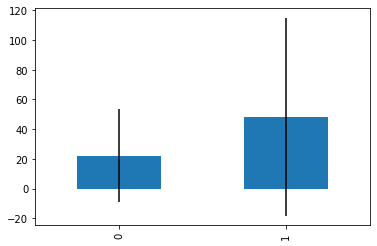

In [67]:
average_fare.plot(kind='bar', yerr=std_fare, legend=False)
plt.show()

由上图表可知，票价与是否生还有一定的相关性，生还者的平均票价要大于未生还者的平均票价。

#### 3.9 船舱类型和存活与否的关系 Cabin

由于船舱的缺失值确实太多，有效值仅仅有204个，很难分析出不同的船舱和存活的关系，所以在做特征工程的时候，可以直接将该组特征丢弃掉。 当然，这里我们也可以对其进行一下分析，对于缺失的数据都分为一类。 简单地将数据分为是否有Cabin记录作为特征，与生存与否进行分析：

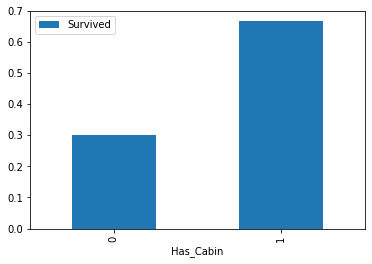

In [68]:
train['Has_Cabin'] = train.Cabin.apply(lambda x: 0 if x == 'U0' else 1)

train[['Has_Cabin','Survived']].groupby(['Has_Cabin']).mean().plot.bar()

**对不同类型的船舱进行分析：**

In [69]:
# create feature for the alphabetical part of the cabin number
import re

train['CabinLetter'] = train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train['CabinLetter'].head()

0    U
1    C
2    U
3    C
4    U
Name: CabinLetter, dtype: object

In [70]:
np.unique(train['CabinLetter'])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'], dtype=object)

In [71]:
pd.factorize(train['CabinLetter'])

(array([0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
        0, 5, 0, 0, 0, 1, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 6, 1, 0, 0, 0, 0, 0, 6, 1, 0, 0, 0,
        7, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 2, 0, 0, 0, 5, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 2, 4, 0, 0, 0, 7, 0, 0, 0,
        0, 0, 0, 0, 4, 1, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 6, 0, 0, 0, 5, 0,
        0, 1, 0, 0, 0, 0, 0, 7, 0, 5, 0, 0, 0, 0, 0, 0, 0, 7, 6, 6, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 4, 0, 0, 3, 1, 0, 0, 0, 0, 6, 0, 0, 0, 0, 2, 6,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0,
        0, 0, 0, 0, 0, 6, 4, 0, 0, 0, 

In [72]:
# convert the distinct cabin letters with incremental integer values
train['CabinLetter'] = pd.factorize(train['CabinLetter'])[0]
train['CabinLetter'].head()
# pd.factorize(train['CabinLetter'])[0]

0    0
1    1
2    0
3    1
4    0
Name: CabinLetter, dtype: int64

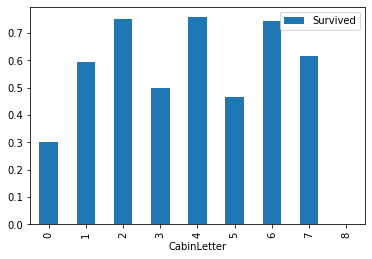

In [73]:
train[['CabinLetter','Survived']].groupby(['CabinLetter']).mean().plot.bar()

不同的船舱生存率也有不同，但是差别不是很大。所以在处理中，我们可以直接将特征删除。

#### 3.10 港口和存活与否的关系 Embarked

泰坦尼克号从英国的南安普顿港出发，途径法国瑟堡和爱尔兰昆士敦，那么在昆士敦之前上船的人，有可能在瑟堡或昆士敦下船，这些人将不会遇到海难。

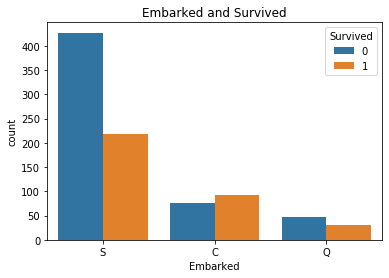

In [74]:
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Embarked and Survived')
plt.show()

In [75]:
train.groupby(['Embarked', 'Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
Name: Survived, dtype: int64

In [76]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


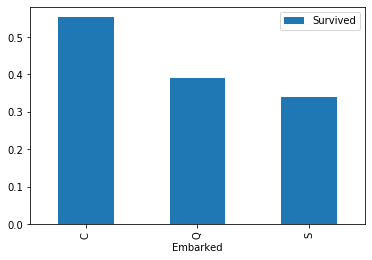

In [77]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().plot.bar()

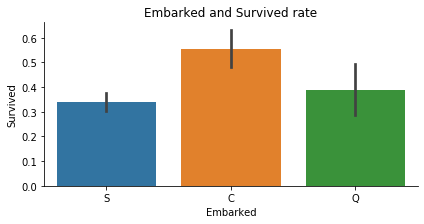

In [79]:
sns.factorplot(x='Embarked', y='Survived', data=train, size=3, aspect=2, kind="bar")
plt.title('Embarked and Survived rate')
plt.show()

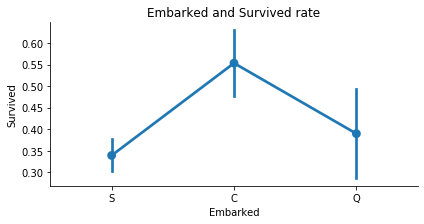

In [80]:
sns.factorplot(x='Embarked', y='Survived', data=train, size=3, aspect=2)
plt.title('Embarked and Survived rate')
plt.show()

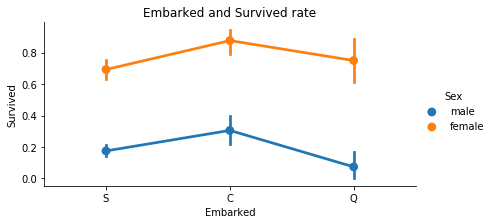

In [81]:
sns.factorplot(x='Embarked', y='Survived', data=train, size=3, aspect=2, hue='Sex')
plt.title('Embarked and Survived rate')
plt.show()

由上可以看出，在不同的港口上船，生还率不同，C最高，Q次之，S最低。 以上为所给出的数据特征与生还与否的分析。 据了解，泰坦尼克号上共有2224名乘客。本训练数据只给出了891名乘客的信息，如果该数据集是从总共的2224人随机选出的，根据中心极限定理，该样本的数据量也足够大，那么我们的分析结果就具有代表性；但如果不是随机选取，那么我们的分析结果就可能不太靠谱了。

### 4. 变量转换

变量转换的目的是将数据转换为适用于模型使用的数据，不同模型接受不同类型的数据，Scikit-learn要求数据都是数字型numeric，所以我们要将一些非数字型的原始数据转换为数字型numeric。 所以下面对数据的转换进行介绍，以在进行特征工程的时候使用。 所有的数据可以分为两类：

1.定性（Qualitative）变量可以以某种方式，Age就是一个很好的例子。

2.定量（Quantitative）变量描述了物体的某一（不能被数学表示的）方面，Embarked就是一个例子。

**定性（Qualitative）转换：**

#### 4.1 Dummy Variables
就是类别变量或者二元变量，当qualitative variable是一些频繁出现的几个独立变量时，Dummy Variables比较适用。我们以Embarked只包含三个值’S'，‘C'，’Q'，我们可以使用下面的代码将其转换为dummies：

In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Age_int        891 non-null int32
Age_group      891 non-null category
Title          891 non-null object
Name_length    891 non-null int64
Family_Size    891 non-null int64
Has_Cabin      891 non-null int64
CabinLetter    891 non-null int64
dtypes: category(1), float64(2), int32(1), int64(9), object(6)
memory usage: 123.0+ KB


In [83]:
embark_dummies = pd.get_dummies(train['Embarked'])
embark_dummies.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [84]:
train = train.join(embark_dummies)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_int,Age_group,Title,Name_length,Family_Size,Has_Cabin,CabinLetter,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,22,"(18, 65]",Mr,23,2,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,38,"(18, 65]",Mrs,51,2,1,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,26,"(18, 65]",Miss,22,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,35,"(18, 65]",Mrs,44,2,1,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,35,"(18, 65]",Mr,24,1,0,0,0,0,1


In [85]:
train.drop(['Embarked'], axis=1, inplace=True)

In [86]:
embark_dummies = train[['S','C','Q']]
embark_dummies.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_int,Age_group,Title,Name_length,Family_Size,Has_Cabin,CabinLetter,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,22,"(18, 65]",Mr,23,2,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,38,"(18, 65]",Mrs,51,2,1,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,26,"(18, 65]",Miss,22,1,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,35,"(18, 65]",Mrs,44,2,1,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,35,"(18, 65]",Mr,24,1,0,0,0,0,1


#### 4.2 Factoring

dummy不好处理Cabin（船舱号）这种标称属性，因为他出现的变量比较多。所以Pandas有一个方法叫做factorize()，它可以创建一些数字，来表示类别变量，对每一个类别映射一个ID，这种映射最后只生成一个特征，不像dummy那样生成多个特征。

In [92]:
train[['Cabin','CabinLetter']].head()

,Cabin,CabinLetter
0,U0,0
1,C85,1
2,U0,0
3,C123,1
4,U0,0


**定量（Quantitative）转换:**
#### 4.3 Scaling
Scaling可以将一个很大范围的数值映射到一个很小范围（通常是 -1到1，或者是0到1），很多情况下我们需要将数值做Scaling使其范围大小一样，否则大范围数特征将会有更高的权重。比如：Age的范围可能只是0-100，而income的范围可能是0-10000000，在某些对数组大小敏感的模型中会影响其结果。

In [96]:
from sklearn.preprocessing import StandardScaler

assert np.size(train['Age']) == 891

std = StandardScaler()
train['Age_scaled'] = std.fit_transform(train['Age'].values.reshape(-1,1))
train['Age_scaled'].head()

0   -0.557330
1    0.608192
2   -0.265949
3    0.389656
4    0.389656
Name: Age_scaled, dtype: float64

#### 4.4 Binning
Binning通过观察“邻居”（即周围的值）将连续数据离散化。存储的值被分布到一些“桶”或“箱”中，就像直方图的bin将数据划分成几块一样。

In [97]:
# Divide all fares into quartiles
train['Fare_bin'] = pd.qcut(train['Fare'], 5)
train['Fare_bin'].head()

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

`在将数据Binning化后，要么将数据factorize化，要么dummies化`

In [98]:
# qcut() create a new variable that idetifies the quartile range, but we can't use the string
# so either factorize or create dummies from the result
 
# factorize
train['Fare_bin_id'] = pd.factorize(train['Fare_bin'])[0]
train['Fare_bin_id'].head()

0    0
1    1
2    2
3    1
4    2
Name: Fare_bin_id, dtype: int64

In [105]:
# dummies
fare_bin_dummies_df = pd.get_dummies(train['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))
fare_bin_dummies_df.head()

Fare_bin,"Fare_(-0.001, 7.854]","Fare_(7.854, 10.5]","Fare_(10.5, 21.679]","Fare_(21.679, 39.688]","Fare_(39.688, 512.329]"
0,1,0,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,1,0,0,0


In [106]:
train = pd.concat([train, fare_bin_dummies_df], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Q,S,Age_scaled,Fare_bin,Fare_bin_id,"Fare_(-0.001, 7.854]","Fare_(7.854, 10.5]","Fare_(10.5, 21.679]","Fare_(21.679, 39.688]","Fare_(39.688, 512.329]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,-0.557330,"(-0.001, 7.854]",0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0.608192,"(39.688, 512.329]",1,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,-0.265949,"(7.854, 10.5]",2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0.389656,"(39.688, 512.329]",1,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0.389656,"(7.854, 10.5]",2,0,1,0,0,0


### 5.特征工程

在进行特征工程的时候，我们不仅需要对训练数据进行处理，还需要同时将测试数据同训练数据一起处理，使得二者具有相同的数据类型和数据分布。

In [252]:
train_org = pd.read_csv('train.csv')
test_org = pd.read_csv('test.csv')
print(train_org.shape, test_org.shape)

(891, 12) (418, 11)


In [253]:
test_org['Survived'] = 0

combined_train_test = train_org.append(test_org)   # 891+418=1309rows, 12columns
#combined_train_test = pd.concat([train_org, test_org], axis=0)
combined_train_test.tail()

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,0,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,0,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,0,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,0,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,0,2668


In [254]:
PassengerId = test_org['PassengerId']

对数据进行特征工程，也就是从各项参数中提取出对输出结果有或大或小的影响的特征，将这些特征作为训练模型的依据。一般来说，我们会先从含有缺失值的特征开始。

#### 5.1 Embarked
因为“Embarked”项的缺失值不多，所以这里我们以众数来填充：

In [255]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [124]:
#combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0], inplace=True)

In [256]:
combined_train_test['Embarked'].isnull().sum()

2

In [257]:
combined_train_test['Embarked'].isnull().count()

1309

In [258]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

combined_train_test['Embarked'] = si.fit_transform(combined_train_test.loc[:, 'Embarked'].values.reshape(-1, 1))
combined_train_test['Embarked'].isnull().sum()

0

对于三种不同的港口，由上面介绍的数值转换，我们知道可以有两种特征处理方式；dummy和factorizing。因为只有三个港口，所以我们可以直接用dummy来处理：

In [259]:
#为了后面的特征分析，这里我们将Embarked特征进行factorizing
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]
 
#使用pd.get_dummies获取one-hot编码
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'], prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1,0,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,0,1,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,0,0
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,1,0,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,0,0


#### 5.2 Sex
对Sex也进行one-hot编码，也就是dummy处理：

In [260]:
# 为了后面的特征分析，这里我们也将Sex特征进行factorizing
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]
 
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, sex_dummies_df], axis=1)

#### 5.3 Name
首先从名字中提取各种称呼

In [261]:
# what is each person's title?
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(",(.*?)\.").findall(x)[0])
combined_train_test['Title'] = combined_train_test['Title'].apply(lambda x: x.strip())

`将各式称呼进行统一化处理：`

In [262]:
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Dona','Lady'],'Royalty'))
title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
title_Dict.update(dict.fromkeys(['Male','Miss'],'Miss'))
title_Dict.update(dict.fromkeys(['Mr'],'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))
 
combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)

`使用dummy对不同的称呼进行分列：`

In [263]:
#为了后面的特征分析，这里我们也将Title特征进行factorizing
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]

title_dummies_df = pd.get_dummies(combined_train_test['Title'], prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test, title_dummies_df], axis=1)

In [264]:
# 增加名字长度的特征
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)

#### 5.4 Fare
由前面分析可以知道，Fare项在测试数据中缺少一个值，所以需要对该值进行填充。我们按照一二三等舱各自的均价来填充：

下面transform将函数np.mean应用到各个group中。

In [265]:
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))

通过对Ticket数据的分析，我们可以看到部分票号数据有重复，同时结合亲属人数及名字的数据，和票价船舱等级对比，我们可以知道购买的票中有家庭票和团体票，所以我们需要将团体票的票价分配到每个人的头上。

In [266]:
combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')

0      1
1      2
2      1
3      2
4      1
      ..
413    1
414    3
415    1
416    1
417    3
Name: Fare, Length: 1309, dtype: int64

In [267]:
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by=combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare']/combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'],axis=1,inplace=True)

使用binning给票价分等级

In [268]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'], 5)

对于5个等级的票价我们可以继续使用dummy为票价等价分列：

In [269]:
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]
 
fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id']).rename(columns=lambda x: 'Fare_' + str(x))
combined_train_test = pd.concat([combined_train_test, fare_bin_dummies_df], axis=1)
combined_train_test.drop(['Fare_bin'], axis=1, inplace=True)

#### 5.5 Pclass

Pclass这一项，其实已经可以不用继续处理了，我们只需将其转换为dummy形式即可。 但是为了更好的分析，我们这里假设对于不同等级的船舱，各船舱内部的票价也说明了各等级舱的位置，那么也就很有可能与逃生的顺序有关系。所以这里分析出每等舱里的高价和低价位。

In [270]:
combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean()

Pclass
1    33.910500
2    11.411010
3     7.337571
Name: Fare, dtype: float64

In [271]:
from sklearn.preprocessing import LabelEncoder
 
#建立Pclass Fare Category
def pclass_fare_category(df,pclass1_mean_fare,pclass2_mean_fare,pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'
 
Pclass1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(1)
Pclass2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(2)
Pclass3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get(3)
 
#建立Pclass_Fare Category
combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category,args=(
        Pclass1_mean_fare,Pclass2_mean_fare,Pclass3_mean_fare),axis=1)
pclass_level = LabelEncoder()

#给每一项添加标签
pclass_level.fit(np.array(['Pclass1_Low','Pclass1_High','Pclass2_Low','Pclass2_High','Pclass3_Low','Pclass3_High']))
 
#转换成数值
combined_train_test['Pclass_Fare_Category'] = pclass_level.transform(combined_train_test['Pclass_Fare_Category'])
 
# dummy 转换
pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass_Fare_Category']).rename(columns=lambda x: 'Pclass_' + str(x))
combined_train_test = pd.concat([combined_train_test,pclass_dummies_df],axis=1)

同时，我们将Pclass特征factorize化：

In [272]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0]

#### 5.6 Parch and SibSp

由前面的分析，我们可以知道，亲友的数量没有或者太多会影响到Survived。所以将二者合并为FamliySize这一组合项，同时也保留这两项。

In [273]:
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'

combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)
combined_train_test['Family_Size_Category'].head()

0    Small_Family
1    Small_Family
2          Single
3    Small_Family
4          Single
Name: Family_Size_Category, dtype: object

In [274]:
# le_family = LabelEncoder()

# combined_train_test['Family_Size_Category'] = le_family.fit_transform(combined_train_test['Family_Size_Category'].values.reshape(-1, 1))
# combined_train_test['Family_Size_Category'].head()

In [275]:
le_family = LabelEncoder()

le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])
combined_train_test['Family_Size_Category'].head()

0    2
1    2
2    1
3    2
4    1
Name: Family_Size_Category, dtype: int32

In [276]:
family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                        prefix=combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

In [277]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2
0,22.0,NaN,0,7.25000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,0,0,0,0,1,2,2,0,0,1
1,38.0,C85,1,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,0,0,2,2,0,0,1
2,26.0,NaN,0,7.92500,"Heikkinen, Miss. Laina",0,3,0,1,0,...,0,0,0,1,0,1,1,0,1,0
3,35.0,C123,0,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,1,0,0,0,0,2,2,0,0,1
4,35.0,NaN,0,8.05000,"Allen, Mr. William Henry",0,5,0,0,0,...,0,0,0,1,0,1,1,0,1,0


#### 5.7 Age
因为Age项的缺失值较多，所以不能直接填充age的众数或者平均数。

常见的有两种对年龄的填充方式：一种是根据Title中的称呼，如Mr，Master、Miss等称呼不同类别的人的平均年龄来填充；一种是综合几项如Sex、Title、Pclass等其他没有缺失值的项，使用机器学习算法来预测Age。

这里我们使用后者来处理。以Age为目标值，将Age完整的项作为训练集，将Age缺失的项作为测试集。

In [278]:
missing_age_df = pd.DataFrame(combined_train_test[
    ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 
     'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])

missing_age_df.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
0,22.0,0,0,0,23,2,2,7.25000,0,0
1,38.0,1,1,1,51,2,2,35.64165,1,1
2,26.0,0,1,2,22,1,1,7.92500,2,0
3,35.0,0,1,1,44,2,2,26.55000,1,1
4,35.0,0,0,0,24,1,1,8.05000,2,0


In [279]:
missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,NaN,2,0,0,16,1,1,8.4583,2,0
17,NaN,0,0,0,28,1,1,13.0000,3,2
19,NaN,1,1,1,23,1,1,7.2250,4,0
26,NaN,1,0,0,23,1,1,7.2250,4,0
28,NaN,2,1,2,29,1,1,7.8792,0,0


**建立Age的预测模型，我们可以多模型预测，然后再做模型的融合，提高预测的精度。**

In [280]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(missing_age_train, missing_age_test):
    missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
    missing_age_Y_train = missing_age_train['Age']
    missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

    # model 1  gbm
    gbm_reg = GradientBoostingRegressor(random_state=42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [4], 'learning_rate': [0.01], 'max_features': [3]}
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg, gbm_reg_param_grid, cv=3, 
                                                n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
    
    gbm_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_X_train, 
                                                                                 missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_GB'][:4])
    
    
    # model 2 rf
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg, rf_reg_param_grid, cv=3, 
                                               n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
    
    rf_reg_grid.fit(missing_age_X_train, missing_age_Y_train)
    
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_X_train, 
                                                                               missing_age_Y_train)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_X_test)
    print(missing_age_test['Age_RF'][:4])

    
    # two models merge
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    print((missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1))[:4])
    # missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_LR']].mode(axis=1)

    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']], axis=0)
    print(missing_age_test['Age'][:4])
    
    missing_age_test.drop(['Age_GB', 'Age_RF'], axis=1, inplace=True)

    return missing_age_test

利用融合模型预测的结果填充Age的缺失值：

In [281]:
combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train, missing_age_test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.1s finished


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-134.3078486352768
GB Train Error for "Age" Feature Regressor:-65.2562037120689
5     37.508266
17    31.580052
19    34.597808
26    29.076996
Name: Age_GB, dtype: float64
Fitting 3 folds for each of 1 candidates, totalling 3 fits


E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-120.99187412978677
RF Train Error for "Age" Feature Regressor-96.82296812792812
5     33.513123
17    33.098071
19    34.853983
26    28.148613
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)


E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


            0          1
5   33.513123  37.508266
17  31.580052  33.098071
19  34.597808  34.853983
26  28.148613  29.076996
5     35.510695
17    32.339062
19    34.725896
26    28.612805
Name: Age, dtype: float64


E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [282]:
missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,35.510695,2,0,0,16,1,1,8.4583,2,0
17,32.339062,0,0,0,28,1,1,13.0000,3,2
19,34.725896,1,1,1,23,1,1,7.2250,4,0
26,28.612805,1,0,0,23,1,1,7.2250,4,0
28,21.343023,2,1,2,29,1,1,7.8792,0,0


#### 5.8 Ticket
观察Ticket的值，我们可以看到，Ticket有字母和数字之分，而对于不同的字母，可能在很大程度上就意味着船舱等级或者不同船舱的位置，也会对Survived产生一定的影响，所以我们将Ticket中的字母分开，为数字的部分则分为一类。

In [283]:
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)

# 如果要提取数字信息，则也可以这样做，现在我们对数字票单纯地分为一类。
# combined_train_test['Ticket_Number'] = combined_train_test['Ticket'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
# combined_train_test['Ticket_Number'].fillna(0, inplace=True)

# 将 Ticket_Letter factorize
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]

#### 5.9 Cabin
因为Cabin项的缺失值确实太多了，我们很难对其进行分析，或者预测。所以这里我们可以直接将Cabin这一项特征去除。但通过上面的分析，可以知道，该特征信息的有无也与生存率有一定的关系，所以这里我们暂时保留该特征，并将其分为有和无两类。

In [284]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

#### 5.10 特征间相关性分析

我们挑选一些主要的特征，生成特征之间的关联图，查看特征与特征之间的相关性：

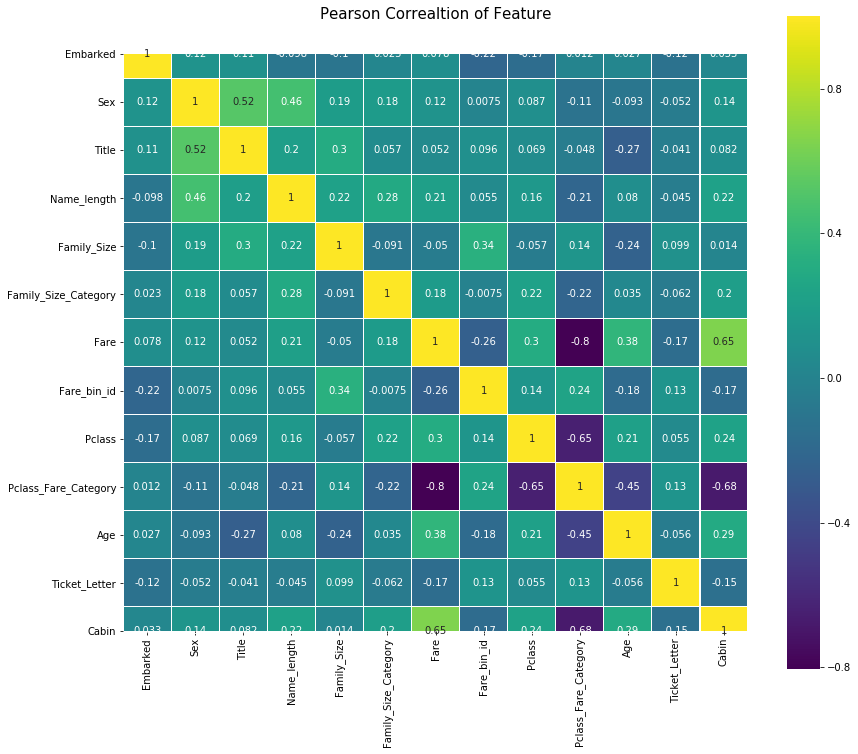

In [285]:
Correlation = pd.DataFrame(combined_train_test[['Embarked','Sex','Title','Name_length','Family_Size',
                                                'Family_Size_Category','Fare','Fare_bin_id','Pclass',
                                                'Pclass_Fare_Category','Age','Ticket_Letter','Cabin']])

colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correaltion of Feature',y=1.05,size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,
            cmap=colormap,linecolor='white',annot=True)

#### 5.11 特征之间的数据分布图

In [286]:
g = sns.pairplot(combined_train_test[[u'Survived',u'Pclass',u'Sex',u'Age',u'Fare',u'Embarked',
                                      u'Family_Size',u'Title',u'Ticket_Letter']],hue='Survived',
                                      palette = 'seismic',height=1.2,diag_kind ='kde',
                                      diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

Error in callback <function flush_figures at 0x0000020A2BB5F6A8> (for post_execute):


KeyboardInterrupt: 

#### 5.12 输入模型前的一些处理：
**5.12.1 一些数据的正则化 这里我们将Age和fare进行正则化：**

In [287]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
combined_train_test[['Age','Fare','Name_length']] = std.fit_transform(combined_train_test[['Age','Fare','Name_length']])

**5.12.2 弃掉无用特征**

对于上面的特征工程中，我们从一些原始的特征中提取出了很多要融合到模型中的特征，但是我们需要剔除那些原本的我们用不到的或者非数值特征： 首先对我们的数据先进行一下备份，以便后期的再次分析

In [288]:
combined_data_backup = combined_train_test

combined_train_test.drop(['PassengerId','Embarked','Sex','Name','Fare_bin_id','Pclass_Fare_Category', 
                          'Parch','SibSp','Family_Size_Category','Ticket'],
                         axis=1,
                         inplace=True)

In [289]:
combined_train_test

,Age,Cabin,Fare,Pclass,Survived,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,...,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,-0.587052,0,-0.554177,0,0,1,0,0,1,0,...,0,0,0,0,1,2,0,0,1,0
1,0.601859,1,1.541869,1,1,0,1,0,0,1,...,0,0,0,0,0,2,0,0,1,1
2,-0.289825,0,-0.504344,0,1,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,2
3,0.378938,1,0.870667,1,1,1,0,0,0,1,...,1,0,0,0,0,2,0,0,1,3
4,0.378938,0,-0.495116,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.035018,0,-0.495116,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,24
414,0.676166,1,1.590472,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1
415,0.639012,0,-0.554177,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,1,0,21
416,-0.062403,0,-0.495116,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,3


**5.12.3 将训练数据和测试数据分开：**

In [290]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]
 
titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)

titanic_train_data_X.shape

(891, 34)

In [291]:
titanic_train_data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 34 columns):
Age                       891 non-null float64
Cabin                     891 non-null int64
Fare                      891 non-null float64
Pclass                    891 non-null int64
Embarked_0                891 non-null uint8
Embarked_1                891 non-null uint8
Embarked_2                891 non-null uint8
Sex_0                     891 non-null uint8
Sex_1                     891 non-null uint8
Title                     891 non-null int64
Title_-1                  891 non-null uint8
Title_0                   891 non-null uint8
Title_1                   891 non-null uint8
Title_2                   891 non-null uint8
Title_3                   891 non-null uint8
Title_4                   891 non-null uint8
Title_5                   891 non-null uint8
Name_length               891 non-null float64
Fare_0                    891 non-null uint8
Fare_1                    891 non-

### 6. 模型融合及测试

模型融合的过程需要分几步来进行。

#### 6.1 利用不同的模型来对特征进行筛选，选出较为重要的特征：

In [296]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
def get_top_n_features(titanic_train_data_X,titanic_train_data_Y,top_n_features):
    
    #randomforest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators':[500],'min_samples_split':[2,3],'max_depth':[20]}
    
    rf_grid = model_selection.GridSearchCV(rf_est,rf_param_grid,n_jobs=-1,cv=3,verbose=1)
    rf_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    
    feature_imp_sorted_rf = pd.DataFrame({'feature':list(titanic_train_data_X),
            'importance':rf_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    
    print('Sample 10 Feeatures from RF Classifier')
    print(str(features_top_n_rf[:10]))
    
    
    #AdaBoost
    ada_est = AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1]}
    
    ada_grid = model_selection.GridSearchCV(ada_est,ada_param_grid,n_jobs=-1,cv=3,verbose=1)
    ada_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    
    feature_imp_sorted_ada = pd.DataFrame({'feature':list(titanic_train_data_X),
            'importance':ada_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Features from Ada Classifier:')
    print(str(features_top_n_ada[:10]))
    
    
    #ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators':[500],'min_samples_split':[3,4],'max_depth':[20]}
    et_grid = model_selection.GridSearchCV(et_est,et_param_grid,n_jobs=-1,cv=3,verbose=1)
    et_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best DT Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature':list(titanic_train_data_X),
            'importance':et_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    
    # GradientBoosting
    gb_est = GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators':[500],'learning_rate':[0.01,0.1],'max_depth':[20]}
    gb_grid = model_selection.GridSearchCV(gb_est,gb_param_grid,n_jobs=-1,cv=3,verbose=1)
    gb_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature':list(titanic_train_data_X),
             'importance':gb_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split':[2,4],'max_depth':[20]}
    dt_grid = model_selection.GridSearchCV(dt_est,dt_param_grid,n_jobs=-1,cv=3,verbose=1)
    dt_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    
    print('Top N Features Bset DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X,titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature':list(titanic_train_data_X),
             'importance':dt_grid.best_estimator_.feature_importances_}).sort_values('importance',ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf,features_top_n_ada,features_top_n_et,
                                features_top_n_gb,features_top_n_dt], ignore_index=True).drop_duplicates()
    
    features_importance = pd.concat([feature_imp_sorted_rf,feature_imp_sorted_ada,feature_imp_sorted_et,
                                     feature_imp_sorted_gb,feature_imp_sorted_dt], ignore_index=True)
    
    return features_top_n, features_importance

#### 6.2 依据我们筛选出的特征构建训练集和测试集
但如果在进行特征工程的过程中，产生了大量的特征，而特征与特征之间会存在一定的相关性。太多的特征一方面会影响训练的速度，另一方面也可能会使得模型过拟合。所以在特征太多的情况下，我们可以利用不同的模型对特征进行筛选，选取我们想要的前n个特征。

In [297]:
feature_to_pick = 30
feature_top_n,feature_importance = get_top_n_features(titanic_train_data_X,titanic_train_data_Y,feature_to_pick)
feature_top_n

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.0s finished


Top N Features Best RF Params:{'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best RF Score:0.8181818181818182
Top N Features RF Train Score:0.978675645342312
Sample 10 Feeatures from RF Classifier
0               Age
17      Name_length
2              Fare
8             Sex_1
11          Title_0
9             Title
7             Sex_0
29      Family_Size
3            Pclass
33    Ticket_Letter
Name: feature, dtype: object
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.8s finished


Top N Features Best Ada Params:{'learning_rate': 0.1, 'n_estimators': 500}
Top N Features Best Ada Score:0.8159371492704826
Top N Features Ada Train Score:0.8462401795735129
Sample 10 Features from Ada Classifier:
0               Age
17      Name_length
2              Fare
33    Ticket_Letter
29      Family_Size
14          Title_3
11          Title_0
12          Title_1
3            Pclass
7             Sex_0
Name: feature, dtype: object
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    1.4s finished


Top N Features Best ET Params:{'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 500}
Top N Features Best DT Score:0.8159371492704827
Top N Features ET Train Score:0.9730639730639731
Sample 10 Features from ET Classifier:
11          Title_0
7             Sex_0
8             Sex_1
17      Name_length
0               Age
2              Fare
9             Title
1             Cabin
33    Ticket_Letter
3            Pclass
Name: feature, dtype: object
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.9s finished


Top N Features Best GB Params:{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 500}
Top N Features Best GB Score:0.7867564534231201
Top N Features GB Train Score:0.9966329966329966
Sample 10 Feature from GB Classifier:
11                   Title_0
0                        Age
17               Name_length
2                       Fare
29               Family_Size
30    Family_Size_Category_0
3                     Pclass
28                  Pclass_5
33             Ticket_Letter
16                   Title_5
Name: feature, dtype: object
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Top N Features Bset DT Params:{'max_depth': 20, 'min_samples_split': 4}
Top N Features Best DT Score:0.7699214365881032
Top N Features DT Train Score:0.9719416386083053
Sample 10 Features from DT Classifier:
11                   Title_0
0                        Age
2                       Fare
17               Name_length
30    Family_Size_Category_0
16                   Title_5
28            

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.0s finished


0                        Age
1                Name_length
2                       Fare
3                      Sex_1
4                    Title_0
5                      Title
6                      Sex_0
7                Family_Size
8                     Pclass
9              Ticket_Letter
10                     Cabin
11                   Title_2
12    Family_Size_Category_2
13                   Title_1
14    Family_Size_Category_0
15                Embarked_0
16                    Fare_1
17                  Pclass_5
18                    Fare_4
19                  Pclass_4
20                Embarked_1
21    Family_Size_Category_1
22                  Pclass_1
23                    Fare_2
24                   Title_3
25                    Fare_0
26                Embarked_2
27                  Pclass_3
28                    Fare_3
29                   Title_5
53                  Pclass_2
55                  Pclass_0
59                   Title_4
Name: feature, dtype: object

In [298]:
feature_importance

,feature,importance
0,Age,0.133108
1,Name_length,0.117069
2,Fare,0.110959
3,Sex_1,0.077349
4,Title_0,0.076044
...,...,...
165,Fare_3,0.000000
166,Title_-1,0.000000
167,Title_4,0.000000
168,Title_3,0.000000


In [299]:
titanic_train_data_X = pd.DataFrame(titanic_train_data_X[feature_top_n])
titanic_test_data_X = pd.DataFrame(titanic_test_data_X[feature_top_n])
titanic_train_data_X

,Age,Name_length,Fare,Sex_1,Title_0,Title,Sex_0,Family_Size,Pclass,Ticket_Letter,...,Fare_2,Title_3,Fare_0,Embarked_2,Pclass_3,Fare_3,Title_5,Pclass_2,Pclass_0,Title_4
0,-0.587052,-0.434672,-0.554177,0,1,0,1,2,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.601859,2.511806,1.541869,1,0,1,0,2,1,1,...,0,0,0,0,0,0,0,0,1,0
2,-0.289825,-0.539904,-0.504344,1,0,2,0,1,0,2,...,1,0,0,0,0,0,0,0,0,0
3,0.378938,1.775186,0.870667,1,0,1,0,2,1,3,...,0,0,0,0,0,0,0,0,0,0
4,0.378938,-0.329441,-0.495116,0,1,0,1,1,0,3,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.215518,-0.645135,-0.129677,0,0,5,1,1,2,3,...,0,0,0,0,0,1,1,1,0,0
887,-0.809973,0.091485,1.125368,1,0,2,0,1,1,3,...,0,0,0,0,0,0,0,0,0,0
888,-1.808680,1.354261,-0.656611,1,0,2,0,4,0,15,...,0,0,0,0,0,0,0,0,0,0
889,-0.289825,-0.645135,1.125368,0,1,0,1,1,1,3,...,0,0,0,0,0,0,0,0,0,0


**用视图可视化不同算法筛选的特征排序：**

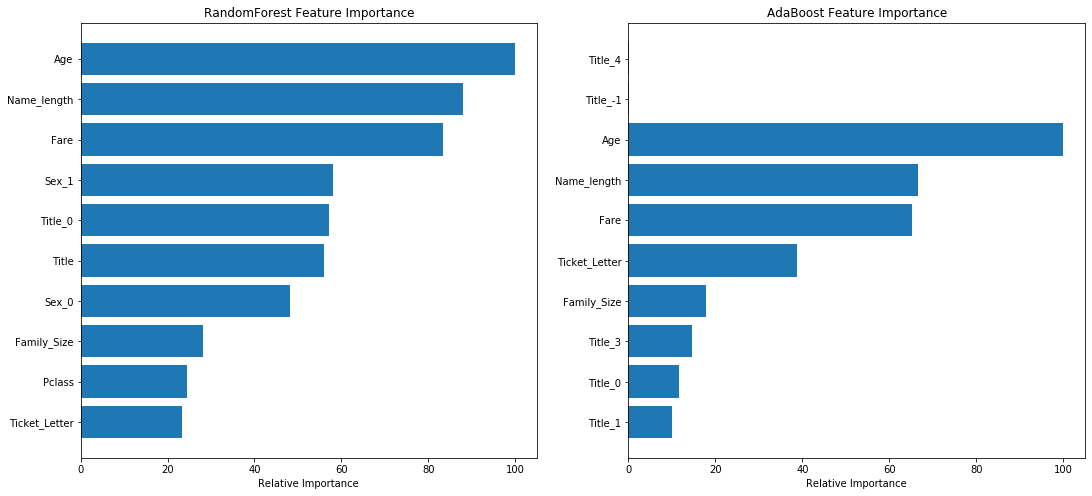

In [301]:
rf_feature_imp = feature_importance[:10]
Ada_feature_imp = feature_importance[32:32+10].reset_index(drop=True)

# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())

# Get the indexes of all features over the importance threshold
rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]

# Adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
pos = np.arange(rf_important_idx.shape[0]) + .5

plt.figure(1, figsize = (18, 8))

plt.subplot(121)
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')

plt.subplot(122)
plt.barh(pos, Ada_feature_importance[Ada_important_idx][::-1])
plt.yticks(pos, Ada_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('AdaBoost Feature Importance')

plt.show()

### 6.3 模型融合（Model Ensemble）
常见的模型融合方法有：Bagging、Boosting、Stacking、Blending。

#### 6.3.1 Bagging
Bagging将多个模型，也就是基学习器的预测结果进行简单的加权平均或者投票。它的好处是可以并行地训练基学习器。Random Forest就用到了Bagging的思想。

#### 6.3.2 Boosting
Boosting的思想有点像知错能改，每个基学习器是在上一个基学习器学习的基础上，对上一个基学习器的错误进行弥补。我们将会用到的AdaBoost，Gradient Boost就用到了这种思想。

#### 6.3.3. Stacking
Stacking是用新的次学习器去学习如何组合上一层的基学习器。如果把Bagging看作是多个基分类器的线性组合，那么Stacking就是多个基分类器的非线性组合。Stacking可以将学习器一层一层地堆砌起来，形成一个网状的结构。 相比来说Stacking的融合框架相对前面二者来说在精度上确实有一定的提升，所以在下面的模型融合上，我们也使用Stacking方法。

#### 6.3.4 Blending
Blending和Stacking很相似，但同时它可以防止信息泄露的问题。

Stacking框架融合：这里我们使用了两层的模型融合

Level 1使用了：Random Forest、AdaBoost、ExtraTrees、GBDT、Decision Tree、KNN、SVM，一共7个模型

Level 2使用了XGBoost，使用第一层预测的结果作为特征对最终的结果进行预测。

**Level 1：**

Stacking框架是堆叠使用基础分类器的预测作为对二级模型的训练的输入。然而，我们不能简单地在全部训练数据上训练基本模型，产生预测，输出用于第二层的训练。如果我们在Train Data上训练，然后在Train Data上预测，就会造成标签。为了避免标签，我们需要对每个基学习器使用K-fold，将Kge模型对Valid Set的预测结果拼起来，作为下一层学习器的输入。

所以这里我们建立输出fold预测方法：

In [302]:
from sklearn.model_selection import KFold
 
# Some useful parameters which will come in handy later on
ntrain = titanic_train_data_X.shape[0]
ntest = titanic_test_data_X.shape[0]
SEED = 0 #for reproducibility
NFOLDS = 7 # set folds for out-of-fold prediction
kf = KFold(n_splits = NFOLDS,random_state=SEED,shuffle=False)
 
def get_out_fold(clf,x_train,y_train,x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS,ntest))
    
    for i, (train_index,test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr,y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i,:] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


构建不同的基学习器，这里我们使用了RandomForest、AdaBoost、ExtraTrees、GBDT、DecisionTree、KNN、SVM七个基学习器：（这里的模型可以使用如上面的GridSearch方法对模型的超参数进行搜索选择

In [303]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
 
rf = RandomForestClassifier(n_estimators=500,warm_start=True,max_features='sqrt',max_depth=6,
                            min_samples_split=3,min_samples_leaf=2,n_jobs=-1,verbose=0)
 
ada = AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
 
et = ExtraTreesClassifier(n_estimators=500,n_jobs=-1,max_depth=8,min_samples_leaf=2,verbose=0)
 
gb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.008,min_samples_split=3,min_samples_leaf=2,
                                max_depth=5,verbose=0)
 
dt = DecisionTreeClassifier(max_depth=8)
 
knn = KNeighborsClassifier(n_neighbors=2)
 
svm = SVC(kernel='linear',C=0.025)

将pandas转换为arrays：

In [304]:
# Create Numpy arrays of train,test and target(Survived) dataframes to feed into our models
x_train = titanic_train_data_X.values   #Creates an array of the train data
x_test = titanic_test_data_X.values   #Creates an array of the test data
y_train = titanic_train_data_Y.values

In [305]:
# Create our OOF train and test predictions.These base result will be used as new featurs
rf_oof_train,rf_oof_test = get_out_fold(rf,x_train,y_train,x_test)  # Random Forest
ada_oof_train,ada_oof_test = get_out_fold(ada,x_train,y_train,x_test)  # AdaBoost
et_oof_train,et_oof_test = get_out_fold(et,x_train,y_train,x_test)  # Extra Trees
gb_oof_train,gb_oof_test = get_out_fold(gb,x_train,y_train,x_test)  # Gradient Boost
dt_oof_train,dt_oof_test = get_out_fold(dt,x_train,y_train,x_test)  #Decision Tree
knn_oof_train,knn_oof_test = get_out_fold(knn,x_train,y_train,x_test)  # KNeighbors
svm_oof_train,svm_oof_test = get_out_fold(svm,x_train,y_train,x_test)  # Support Vector
 
print("Training is complete")

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\ensemble\_forest.py:359: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
E:\Anaconda\envs\tensorflow-cpu\lib\

Training is complete


#### 6.4 预测并生成提交文件
Level 2：我们利用XGBoost，使用第一层预测的结果作为特征对最终的结果进行预测。

In [306]:
x_train = np.concatenate((rf_oof_train,ada_oof_train,et_oof_train,gb_oof_train,dt_oof_train,knn_oof_train,svm_oof_train),axis=1)
x_test =np.concatenate((rf_oof_test,ada_oof_test,et_oof_test,gb_oof_test,dt_oof_test,knn_oof_test,svm_oof_test),axis=1)

In [307]:
from xgboost import XGBClassifier
 
gbm = XGBClassifier(n_estimators=200,max_depth=4,min_child_weight=2,gamma=0.9,subsample=0.8,
                    colsample_bytree=0.8,objective='binary:logistic',
                    nthread=-1,scale_pos_weight=1).fit(x_train,y_train)

predictions = gbm.predict(x_test)

In [308]:
StackingSubmission = pd.DataFrame({'PassengerId':PassengerId,'Survived':predictions})
StackingSubmission.to_csv('StackingSubmission.csv',index=False,sep=',')

### 7. 验证：学习曲线

In [310]:
from sklearn.model_selection import learning_curve
 
def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,
                        n_jobs=1,train_sizes=np.linspace(.1,1.0,5),verbose=0):
    """
    Generate a simple plot of the test and training learning curve.
    
    Parameters
    -------------
    estimator:object type that implents the "fit" and "predict" methods
    An object of that type which is cloned for each validation.
    
    title:string
    Title for the chart.
    
    X:array-like,shape(n_samples,n_features)
    Training vector,where n_samples is the number of samples and n_features is 
    the number of features.
    
    y:array-like,shape(n_samples) or (n_samples,n_features),optional
    Target relative to X for classification or regression;
    None for unsupervised learning.
    
    ylim:tuple,shape(ymin,ymax),optional
    Defines minimum and maximum yvalues plotted.
    
    cv:integer,cross-validation generator,optional
    If an integer is passed,it is the number of folds(defaults to 3).
    Specific cross-validation objects can be passed,see
    sklearn.cross_validation module for the list of possible objects
    
    n_jobs:integer,optional
    Number of jobs to run in parallel(default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,
                                                          n_jobs=n_jobs,train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes,train_scores_mean,'o-',color="r",label="Training score")
    plt.plot(train_sizes,test_scores_mean,'o-',color="g",label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

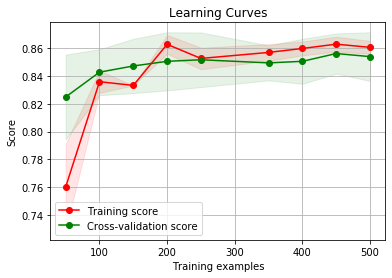

In [311]:
X = x_train
Y = y_train
 
# RandomForest
rf_parameters = {'n_jobs':-1,'n_estimators':500,'warm_start':True,'max_depth':6,
                 'min_samples_leaf':2,'max_features':'sqrt','verbose':0}
 
# AdaBoost
ada_parameters = {'n_estimators':500,'learning_rate':0.1}
 
# ExtraTrees
et_parameters = {'n_jobs':-1,'n_estimators':500,'max_depth':8,'min_samples_leaf':2,'verbose':0}
 
# GradientBoosting
gb_parameters = {'n_estimators':500,'max_depth':5,'min_samples_leaf':2,'verbose':0}
 
# DecisionTree
dt_parameters = {'max_depth':8}
 
# KNeighbors
knn_parameters = {'n_neighbors':2}
 
# SVM
svm_parameters = {'kernel':'linear','C':0.025}

# XGB
gbm_parameters = {'n_estimators':2000,'max_depth':4,'min_child_weight':2,'gamma':0.9,'subsample':0.8,
                  'colsample_bytree':0.8,'objective':'binary:logistic','nthread':-1,'scale_pos_weight':1}
 
 
title = "Learning Curves"
plot_learning_curve(RandomForestClassifier(**rf_parameters),title,X,Y,cv=None,n_jobs=4,
                    train_sizes=[50,100,150,200,250,350,400,450,500])
plt.show()